# Solutions 7 - Examples in Sparse + Low-Rank Splitting

## Assignment 1

We need functions from the notebook 
[L13 Sparse + Low-Rank Splitting](L13+Sparse+++Low-Rank+Splitting.ipynb).

In [1]:
using LinearAlgebra
# Shrinkage
function Shr(x::Array{T},τ::T) where T
    sign.(x).*max.(abs.(x).-τ,zero(T))
end

# Singular value thresholding
function D(A::Array{T},τ::T) where T
    # This can be replaced by a faster approach
    V=svd(A)
    S=Shr(V.S,τ)
    k=count(!iszero,S)
    return (V.U[:,1:k]*Diagonal(S[1:k]))*V.Vt[1:k,:]
end

D (generic function with 1 method)

In [2]:
function PCPAD(A::Array{T}) where T
    # Initialize
    δ=1.0e-7
    tol=δ*norm(A)
    m,n=size(A)
    S=zero(A)
    Y=zero(A)
    L=zero(A)
    T₁=zero(A)
    μ=(m*n)/(4*(norm(A[:],1)))
    μ₁=one(T)/μ
    λ=one(T)/sqrt(max(map(T,m),n))
    λμ₁=λ*μ₁
    ν=1e20
    maxiter=1000
    iterations=0
    # Iterate
    while (ν>tol) && iterations<maxiter
        # println(iterations," ",ν)
        iterations+=1
        L.=D(A-S+μ₁.*Y,μ₁)
        S.=Shr(A-L+μ₁.*Y,λμ₁)
        T₁.=(A-L-S)
        Y.+=(μ.*T₁)
        ν=norm(T₁)
    end
    L,S, iterations
end

PCPAD (generic function with 1 method)

In [3]:
# For compilation
A0=rand(3,3)

3×3 Array{Float64,2}:
 0.733242   0.374996   0.495449
 0.119369   0.549204   0.871942
 0.0824528  0.0504446  0.946316

In [4]:
L,S,iter=PCPAD(A0)

([0.14457082858602557 0.374995998752602 0.49544917758665585; 0.11936934483804659 0.43345083445067717 0.5108814326391011; 0.08245283388264521 0.06325630498869315 0.15874483756756214], [0.5886715336955655 0.0 0.0; -0.0 0.11575340659734668 0.36106022245731695; 0.0 -0.012811746313898142 0.7875708351268553], 83)

In [5]:
rank(L), L+S-A0

(2, [-1.1102230246251565e-16 1.1636468616460505e-7 3.854013685966606e-8; -1.4425077382584917e-8 0.0 -2.220446049250313e-16; 1.6000757913081642e-8 -2.3592239273284576e-16 -2.220446049250313e-16])

In [6]:
L

3×3 Array{Float64,2}:
 0.144571   0.374996   0.495449
 0.119369   0.433451   0.510881
 0.0824528  0.0632563  0.158745

In [7]:
# Packages for video manipulation
# import Pkg; Pkg.add("VideoIO")
# import Pkg; Pkg.add("Makie")

In [8]:
using Images
using Makie, VideoIO

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1260
┌ Info: Precompiling Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a]
└ @ Base loading.jl:1260
┌ Info: Precompiling VideoIO [d6d074c3-1acf-5d4c-9a43-ef38773959a2]
└ @ Base loading.jl:1260


In [9]:
varinfo(VideoIO)

| name           |      size | summary                |
|:-------------- | ---------:|:---------------------- |
| VideoIO        | 1.018 MiB | Module                 |
| appendencode!  |   0 bytes | typeof(appendencode!)  |
| encode!        |   0 bytes | typeof(encode!)        |
| encodevideo    |   0 bytes | typeof(encodevideo)    |
| finishencode!  |   0 bytes | typeof(finishencode!)  |
| gettime        |   0 bytes | typeof(gettime)        |
| mux            |   0 bytes | typeof(mux)            |
| opencamera     |   0 bytes | typeof(opencamera)     |
| openvideo      |   0 bytes | typeof(openvideo)      |
| play           |   0 bytes | typeof(play)           |
| playvideo      |   0 bytes | typeof(playvideo)      |
| prepareencoder |   0 bytes | typeof(prepareencoder) |
| pump           |   0 bytes | typeof(pump)           |
| read           |   0 bytes | typeof(read)           |
| read!          |   0 bytes | typeof(read!)          |
| viewcam        |   0 bytes | typeof(viewcam)        |


In [10]:
video=VideoIO.open("files/visor.avi")

AVInput(files/visor.avi, ...), with
  1 video stream(s)


In [11]:
playvideo(video)

┌ Info: Precompiling ImageIO [82e4d734-157c-48bb-816b-45c225c6df19]
└ @ Base loading.jl:1260
┌ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
└ @ Base loading.jl:1260


In [12]:
VideoIO.get_duration("files/visor.avi")

229.2

In [13]:
# Read the frames in Gray
f = VideoIO.openvideo("files/visor.avi",target_format=VideoIO.AV_PIX_FMT_GRAY8)
frames=Array{Array{Gray{Normed{UInt8,8}},2},1}(undef,0)
while !eof(f)
    push!(frames,read(f))
end
close(f)

In [14]:
# Number of frames
length(frames)

2292

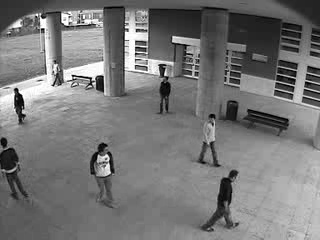

In [15]:
# See particular frame
frames[1401]

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

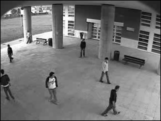
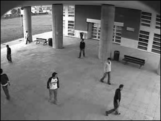
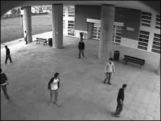
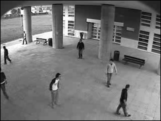
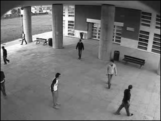
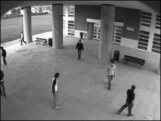
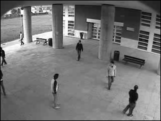
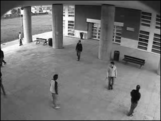
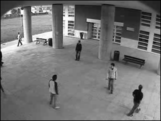
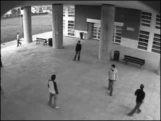
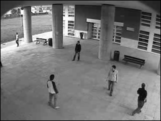
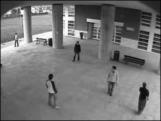
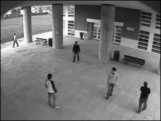
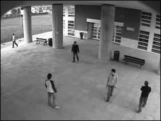
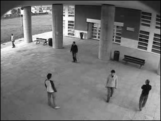
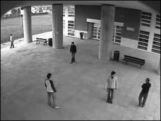
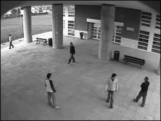
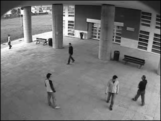
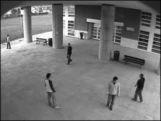
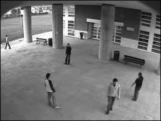
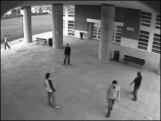
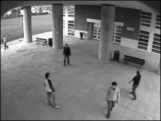
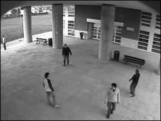
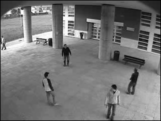
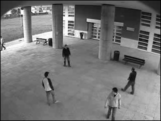
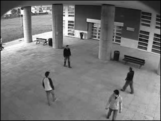
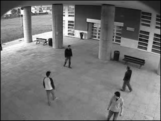
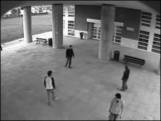
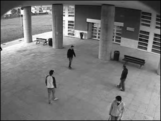
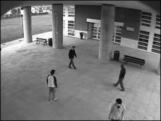
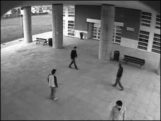
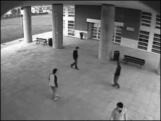
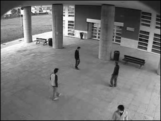
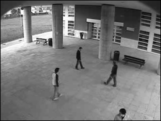
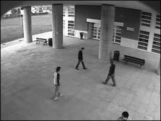
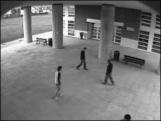
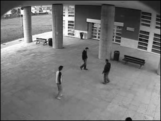
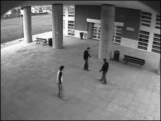
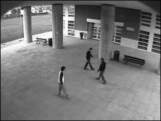
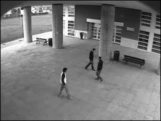
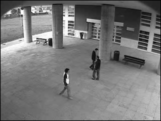
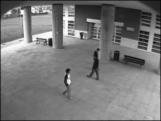
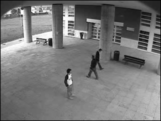
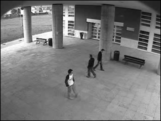
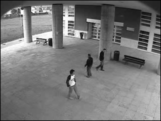
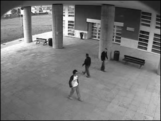
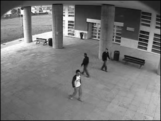
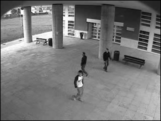
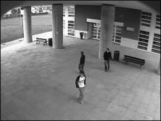
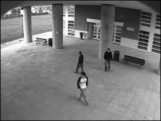

In [16]:
# Make shorter video clip
clip=frames[1401:1450]

In [17]:
size(clip[1])

(240, 320)

In [18]:
# Turn frames into tall matrix
mi,ni=size(clip[1])
m=mi*ni
n=length(clip)
A=Array{Float64}(undef,m,n)
for i=1:n
    A[:,i]=vec(float(clip[i]))
end

In [19]:
size(A)

(76800, 50)

In [20]:
norm(A)

993.2119585880553

In [22]:
# For orientation
@time Q=qr(A);
@time D(A,0.5);

  0.114543 seconds (5 allocations: 29.325 MiB, 21.82% gc time)
  0.329946 seconds (25 allocations: 146.607 MiB)


In [23]:
# Compute the splitting - 4 minutes
@time L,S,iters=PCPAD(A)

535.896983 seconds (42.02 k allocations: 361.787 GiB, 7.74% gc time)


([0.18823530800601174 0.18823530357649265 … 0.17647056764610916 0.17647054229722997; 0.18823530800602248 0.18823530357650342 … 0.17647056764611407 0.1764705422972349; … ; 0.7176470909901755 0.7176470920849694 … 0.7058823769950273 0.705882400571486; 0.7019607808997179 0.7019607832012424 … 0.7137255012368067 0.7137254736428041], [0.0 0.0 … -0.0 -0.0; 0.0 0.0 … -0.0 -0.0; … ; 0.0 0.0 … -0.0 -0.0; -0.0 -0.0 … -0.0 -0.0], 1000)

In [24]:
# Reconstruct the low-rank video component
rank(L), norm(A-L-S), norm(A)

(16, 0.0004293692397533305, 993.2119585880553)

In [25]:
svdvals(L)[1:20]

20-element Array{Float64,1}:
 1000.685641671293
   14.872151740792042
   11.379472221987633
    9.729815137981031
    7.706656406174793
    4.156856638710673
    3.180028276068219
    2.45653107143592
    1.2897504608196235
    0.7788793555613616
    0.6411961879091401
    0.5972429272521264
    0.01857625930341237
    0.008823112225258835
    0.000563932220783042
    0.0002809520311917548
    1.4467087136026894e-13
    2.7156280425745636e-14
    2.7056621945686743e-14
    2.7016194859395314e-14

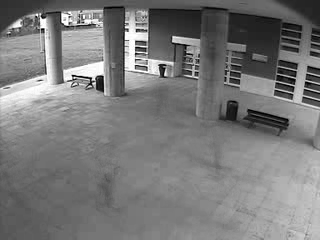

In [26]:
# How to restore the video?
# First frame of the low-rank part
v1=L[:,1]
v2=reshape(v1,mi,ni)
map(Gray{Normed{UInt8,8}},v2)

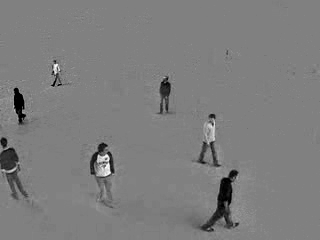

In [27]:
# First frame of the sparse part 
s1=S[:,1]
s2=reshape(s1,mi,ni)
map(Gray{Normed{UInt8,8}},clamp01.(s2.+0.5))

In [28]:
LowRank=similar(clip)
Sparse=similar(clip)
for i=1:n
    LowRank[i]=reshape(L[:,i],mi,ni)
    Sparse[i]=clamp01.(reshape(S[:,i],mi,ni).+0.5)
end

In [29]:
# import Pkg; Pkg.add("JLD")

In [30]:
# Let us save the results
using JLD

In [31]:
@save "files/visor_results.jld" LowRank Sparse

In [32]:
@load "files/visor_results.jld"

7-element Array{Symbol,1}:
 :LowRank
 :Sparse
 Symbol("_creator\\ENDIAN_BOM")
 Symbol("_creator\\JULIA_MAJOR")
 Symbol("_creator\\JULIA_MINOR")
 Symbol("_creator\\JULIA_PATCH")
 Symbol("_creator\\WORD_SIZE")

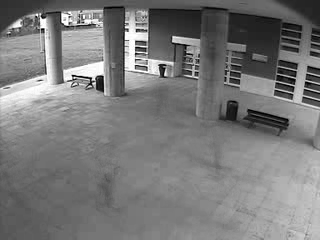

In [33]:
LowRank[1]

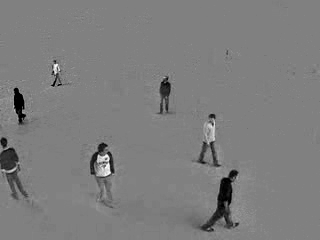

In [34]:
Sparse[1]

In [35]:
# Play the LowRank part a bit slower (framerate=10)
props = [:priv_data => ("crf"=>"22","preset"=>"medium")]
encodevideo("files/LowRank.mp4",LowRank,framerate=10,AVCodecContextProperties=props)

┌ Info: Video file saved: C:\Users\Ivan_Slapnicar\Documents\GitHub\GIAN-Applied-NLA-Course\src\Module C - Applications/files/LowRank.mp4
└ @ VideoIO C:\Users\Ivan_Slapnicar\.julia\packages\VideoIO\TAILL\src\encoding.jl:221
┌ Info: frame=   50 fps=0.0 q=-1.0 Lsize=      54kB time=00:00:04.70 bitrate=  94.1kbits/s speed=4.7e+03x    
└ @ VideoIO C:\Users\Ivan_Slapnicar\.julia\packages\VideoIO\TAILL\src\encoding.jl:222
┌ Info: video:53kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.879838%
└ @ VideoIO C:\Users\Ivan_Slapnicar\.julia\packages\VideoIO\TAILL\src\encoding.jl:223


"files/LowRank.mp4"

In [38]:
videoLowRank=VideoIO.open("files/LowRank.mp4")
playvideo(videoLowRank)

In [39]:
# Play the Sparse part
encodevideo("files/Sparse.mp4",Sparse,framerate=10,AVCodecContextProperties=props)

┌ Info: Video file saved: C:\Users\Ivan_Slapnicar\Documents\GitHub\GIAN-Applied-NLA-Course\src\Module C - Applications/files/Sparse.mp4
└ @ VideoIO C:\Users\Ivan_Slapnicar\.julia\packages\VideoIO\TAILL\src\encoding.jl:221
┌ Info: frame=   50 fps=0.0 q=-1.0 Lsize=      97kB time=00:00:04.70 bitrate= 169.8kbits/s speed=4.71e+03x    
└ @ VideoIO C:\Users\Ivan_Slapnicar\.julia\packages\VideoIO\TAILL\src\encoding.jl:222
┌ Info: video:96kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.032880%
└ @ VideoIO C:\Users\Ivan_Slapnicar\.julia\packages\VideoIO\TAILL\src\encoding.jl:223


"files/Sparse.mp4"

In [40]:
videoSparse=VideoIO.open("files/Sparse.mp4")
playvideo(videoSparse)